# Simulation for Lorenz

In [5]:
import lorenz_map as lmap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [6]:
# The generator: 
gen = lmap.LorenzMap(delta_t=1e-3)   #we've to take small steps to generate correctly the data

In [15]:
# The simulation
res1 =  gen.full_traj(init_pos=np.ones(3)*0.01, nb_steps=100000)
print(res.shape)

(100000, 3)


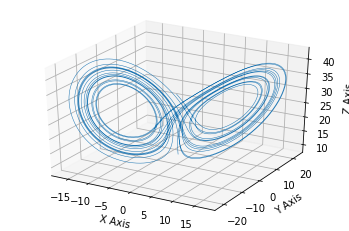

In [16]:
lmap.plot_traj(res1[80000:])


# Look at the component

(20000, 3)


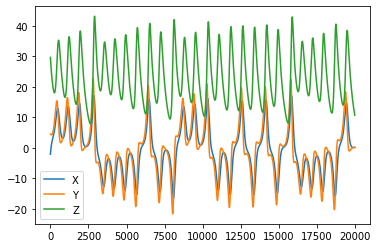

In [17]:
ext1 = res1[80000:]
l = ['X', 'Y', 'Z']
print(ext1.shape)
for i in range(3):
    plt.plot(ext1[:,i],label=l[i])
plt.legend()
plt.show()
#print(ext[:,0])

We can see that the behavior of Z is different from X and Y. Z is almost the same in all trajectories. As we can see in the figure describing the trajectory, the oscillation in Z is always the same in both centers of oscillation (between 20 and 40). In the case of X and Y, we see that they change the pattern of oscillation aleatorily - its change is linked to the chaotic behavior of the system. The system can oscillate in the positive attractor (around 0 - 20) or the negative one (around -20 - 0) - and the change from one to the other is almost "random". We can see in another way here below:

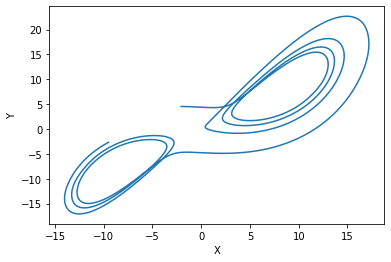

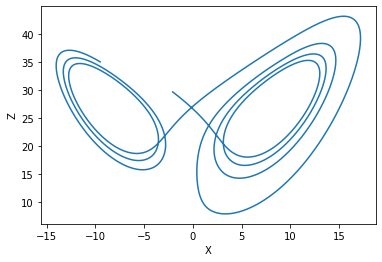

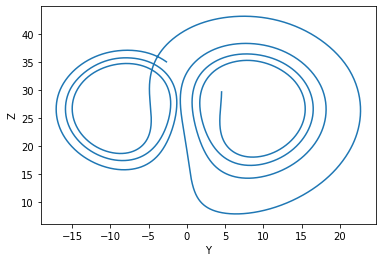

In [18]:
r = range(5000)
#r = range(ext.shape[0])
plt.plot(ext1[r,0],ext1[r,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(ext1[r,0],ext1[r,2])
plt.xlabel('X')
plt.ylabel('Z')
plt.show()
plt.plot(ext1[r,1],ext1[r,2])
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()

# The deltas

(20000, 3)


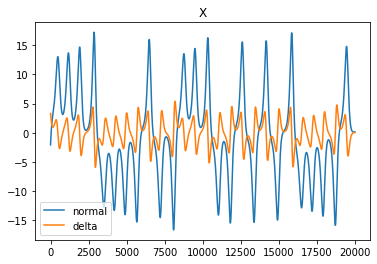

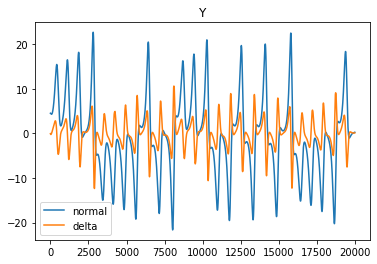

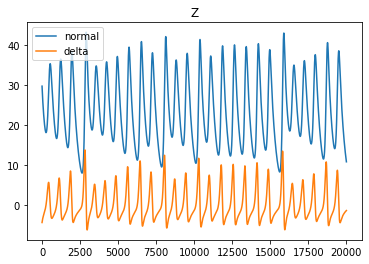

In [19]:
L = 20000 # length
S = 80000 # start
C = 1     # component

delta = res1[S:S+L,:]-res1[S-1:S+L-1,:]
print(delta.shape)

for i in range(3):
    delta2 = delta[:,i]*50
    plt.plot(res1[S:S+L,i],label='normal')
    plt.plot(delta2, label='delta')
    plt.legend()
    plt.title(l[i])
    plt.show()

# The norm of delta

In [12]:
ndelta = np.square(delta)
ndelta = ndelta.sum(axis=1)
print(ndelta.shape)


(20000,)


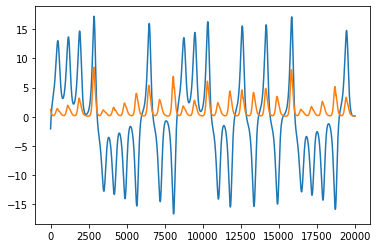

In [20]:
plt.plot(res1[S:S+L,0])
plt.plot(ndelta*100)
plt.show()


# Sensitivity to initial conditions

Let's take a look at the trajectories of different initial conditions

In [55]:
# The simulation of other trajectories

res2 =  gen.full_traj(init_pos=np.ones(3)*0.011, nb_steps=100000)

res3 =  gen.full_traj(init_pos=np.ones(3)*0.10, nb_steps=100000)

# res1 was with one*0.01

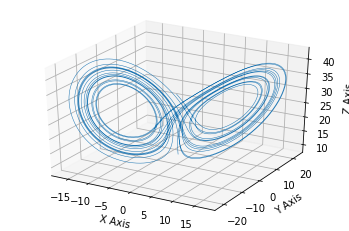

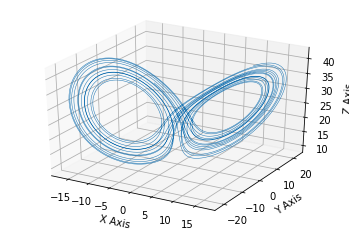

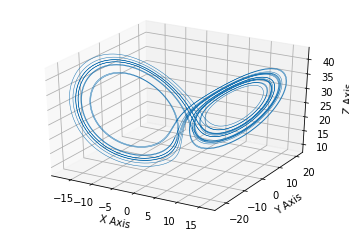

In [56]:
lmap.plot_traj(res1[80000:])
lmap.plot_traj(res2[80000:])
lmap.plot_traj(res3[80000:])

We already can see the difference between them, mainly for the third one. let's try to explore this divergence:

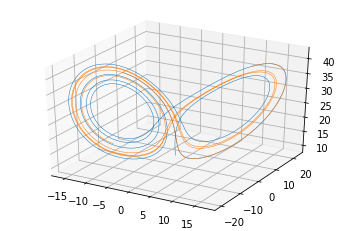

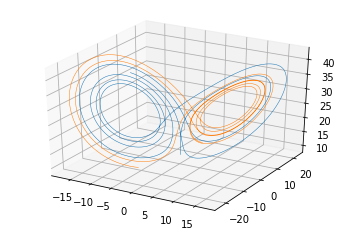

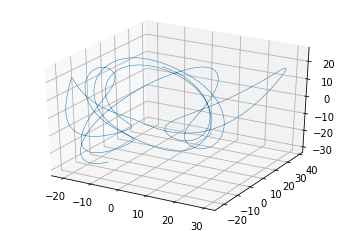

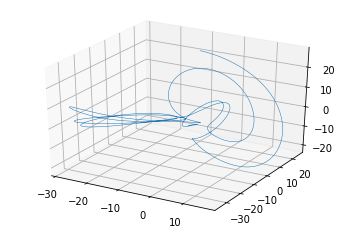

In [57]:
x1, y1, z1 = res1[95000:, 0], res1[95000:, 1], res1[95000:, 2]
plt.gca(projection='3d')
plt.plot(x1, y1, z1, lw=0.5)
x2, y2, z2 = res2[95000:, 0], res2[95000:, 1], res2[95000:, 2]
plt.gca(projection='3d')
plt.plot(x2, y2, z2, lw=0.5)

plt.show()


x1, y1, z1 = res1[95000:, 0], res1[95000:, 1], res1[95000:, 2]
plt.gca(projection='3d')
plt.plot(x1, y1, z1, lw=0.5)

x3, y3, z3 = res3[95000:, 0], res3[95000:, 1], res3[95000:, 2]
plt.gca(projection='3d')
plt.plot(x3, y3, z3, lw=0.5)

plt.show()


plt.gca(projection='3d')
plt.plot(x1-x2, y1-y2, z1-z2, lw=0.5)

plt.show()

plt.gca(projection='3d')
plt.plot(x1-x3, y1-y3, z1-z3, lw=0.5)

plt.show()

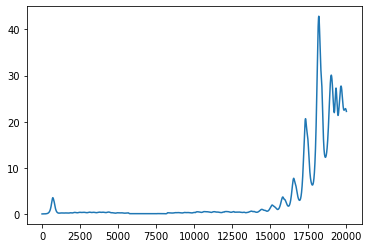

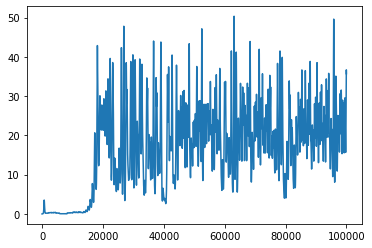

In [72]:
D=20000

x1, y1, z1 = res1[:D, 0], res1[:D, 1], res1[:D, 2]
x2, y2, z2 = res2[:D, 0], res2[:D, 1], res2[:D, 2]
dist2 = np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2) + (z1-z2)*(z1-z2))
plt.plot(dist2)
plt.show()


x1, y1, z1 = res1[:, 0], res1[:, 1], res1[:, 2]
x2, y2, z2 = res2[:, 0], res2[:, 1], res2[:, 2]
dist2 = np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2) + (z1-z2)*(z1-z2))
plt.plot(dist2)
plt.show()

In the beginning, we can see the exponential growth that characterizes the dispersion between two chaotic trajectories with different initial conditions. After the 20000th point, we can see that they don't separate more because they are totally de-correlated but still at the limit of the spatial domain in which the trajectory occurs.

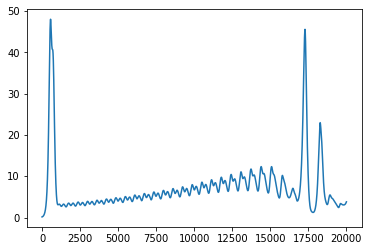

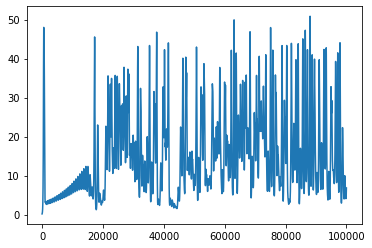

In [73]:
D=20000

x1, y1, z1 = res1[:D, 0], res1[:D, 1], res1[:D, 2]
x3, y3, z3 = res3[:D, 0], res3[:D, 1], res3[:D, 2]
dist3 = np.sqrt((x1-x3)*(x1-x3) + (y1-y3)*(y1-y3) + (z1-z3)*(z1-z3))
plt.plot(dist3)
plt.show()


x1, y1, z1 = res1[:, 0], res1[:, 1], res1[:, 2]
x3, y3, z3 = res3[:, 0], res3[:, 1], res3[:, 2]
dist3 = np.sqrt((x1-x3)*(x1-x3) + (y1-y3)*(y1-y3) + (z1-z3)*(z1-z3))
plt.plot(dist3)
plt.show()

As expected, they diverge quicker than the last one since the third set of points start at a more distant point than the second set.

In [74]:
dist2.shape

(100000,)

(20000, 3)


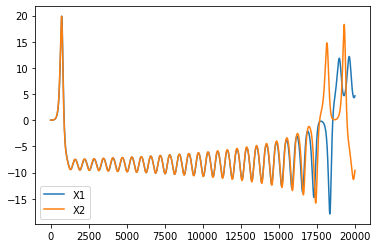

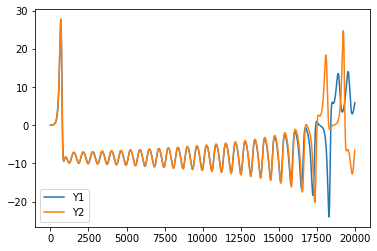

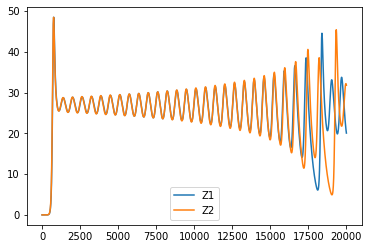

In [79]:
D=20000
ext1 = res1[:D]
ext2 = res2[:D]
ext3 = res3[:D]
l1 = ['X1', 'Y1', 'Z1']
l2 = ['X2', 'Y2', 'Z2']
l3 = ['X3', 'Y3', 'Z3']

print(ext.shape)
for i in range(3):
    plt.plot(ext1[:,i],label=l1[i])
    plt.plot(ext2[:,i],label=l2[i])
    #plt.plot(ext3[:,i],label=l3[i])
    plt.legend()
    plt.show()
#print(ext[:,0])